# ObsID : 0945030131, SRCNUM : 7, Instru : EPN
Not on Simbad

In [9]:
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import numpy as np

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

plt.rcParams['figure.figsize'] = [12,7]

Fit.statMethod = "chi"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4

Default fit statistic is set to: Chi-Squared
   This will apply to all current and newly loaded spectra.
Parameter delta values for fits will now be 0.0001 * parValue


## Load files
Spectrum, Background, Response, Auxiliary response.

In [12]:
spec = Spectrum(glob.glob('ObsID*_SRCNUM*_E*_spectrum_grp.fits')[0])


2 spectra  in use
 
Spectral Data File: ObsID0945030131_SRCNUM7_EPN_spectrum_grp.fits  Spectrum 2
Net count rate (cts/s) for Spectrum:2  9.465e-03 +/- 1.365e-03 (53.2 % total)
 Assigned to Data Group 1 and Plot Group 2
  Noticed Channels:  1-8
  Telescope: XMM Instrument: EPN  Channel Type: PI
  Exposure Time: 1.131e+04 sec
 Using fit statistic: chi
 Using Background File                ObsID0945030131_SRCNUM7_EPN_background_spectrum.fits
  Background Exposure Time: 1.131e+04 sec
 Using Response (RMF) File            ObsID0945030131_SRCNUM7_EPN.rmf for Source 1
 Using Auxiliary Response (ARF) File  ObsID0945030131_SRCNUM7_EPN.arf



In [7]:
n_cts = 9.465e-03*1.131e+04
print("Number of counts =",n_cts)

if int(n_cts)<100:
    print()
    print("The low number of counts indicates that we should consider using cstat fit statistic instead of chi statistic.")

Number of counts = 107.04915


## Plot spectrum

In [13]:
Plot.xAxis="keV"
Plot.device = "/xs"
Plot.xLog=True
Plot.yLog=True
Plot.addCommand("Rescale Y 0.00001 0.05")
Plot("data")
spec.ignore("**-0.2 12-**")

     1 channels (1) ignored in spectrum #     2
      No channels ignored (no channels in specified range)



(-0.5, 856.5, 662.5, -0.5)

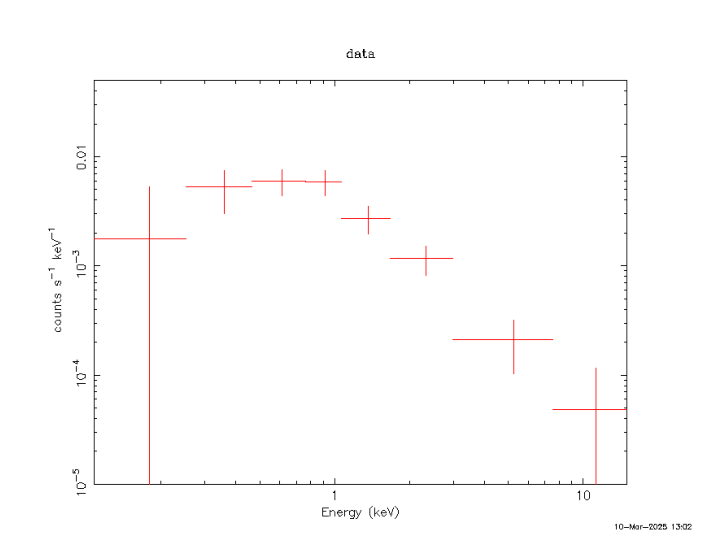

In [14]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum.png')[0])
plt.imshow(img)
plt.axis('off')

### Black body model

In [15]:
AllModels.clear()
mo = Model("tbabs*bbody")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sections as a baseline.

Fit statistic  : Chi-Squared              3.418191e+11     using 8 bins, spec

(-0.5, 856.5, 656.5, -0.5)

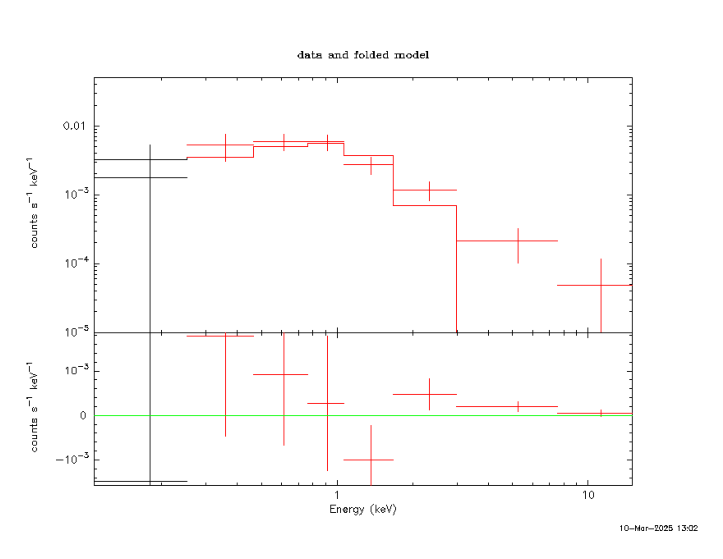

In [16]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_bbody.png')[0])
plt.imshow(img)
plt.axis('off')

### Bremsstrahlung model

In [17]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              1.049833e+10     using 8 bins, spectrum 1.
                 Chi-Squared              1.049819e+10     using 7 bins, spectrum 2.
Total fit statistic                       2.099652e+10     with 12 d.o.f.

Test statistic : Chi-Squared              2.099652e+10     using 15 bins.
 Null hypothesis probability of 0.000000e+00 with 12 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
55.0819      4.06283      -1      0.398184 

(-0.5, 856.5, 661.5, -0.5)

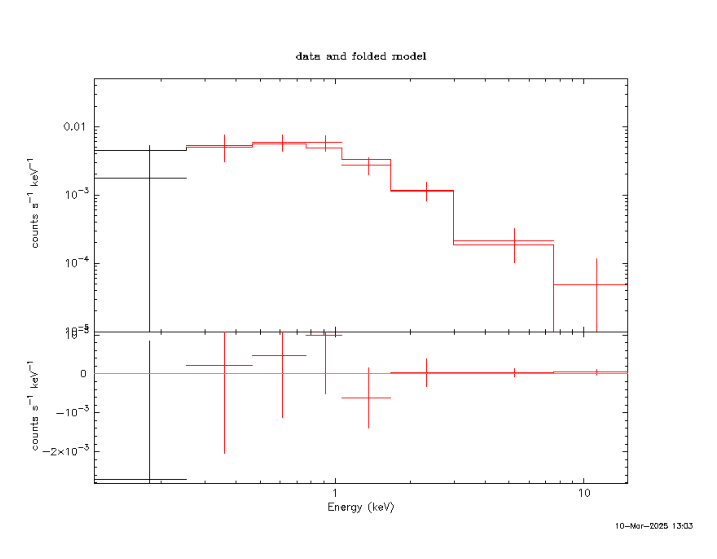

In [18]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_bremss.png')[0])
plt.imshow(img)
plt.axis('off')

### Apec model

In [19]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : Chi-Squared              1.761047e+09     using 8 bins, spectrum 1.
                 Chi-Squared              1.760964e+09     using 7 bins, spectrum 2.
Total fit statistic                       3.522011e+09     with 12 d.o.f.

Test statistic : Chi-Squared              3.522011e+09     using 15 bins.
 Null hypothesis probability of 0.000000e+00 with 12 degrees of freedom
 Current data and model not fit yet.
      

(-0.5, 860.5, 659.5, -0.5)

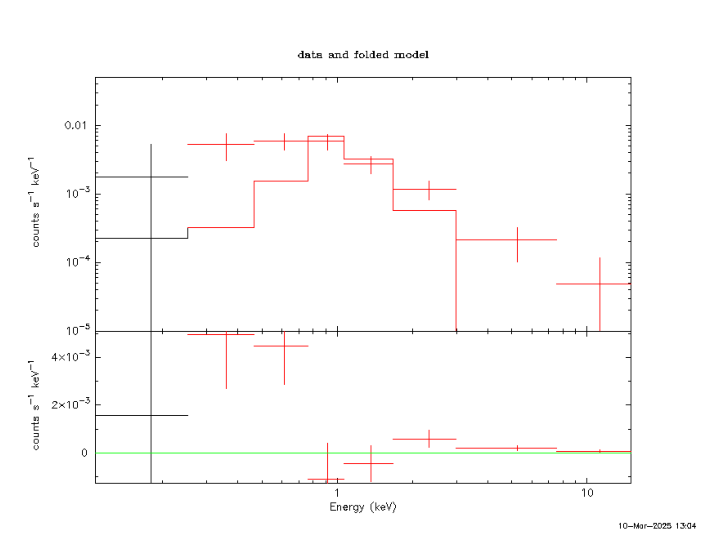

In [20]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_apec.png')[0])
plt.imshow(img)
plt.axis('off')

### Powerlaw model

In [21]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              7.085070e+10     using 8 bins, spectrum 1.
                 Chi-Squared              7.085023e+10     using 7 bins, spectrum 2.
Total fit statistic                       1.417009e+11     with 12 d.o.f.

Test statistic : Chi-Squared              1.417009e+11     using 15 bins.
 Null hypothesis probability of 0.000000e+00 with 12 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
71.4347      4.94596      -2     0.020072

(-0.5, 860.5, 660.5, -0.5)

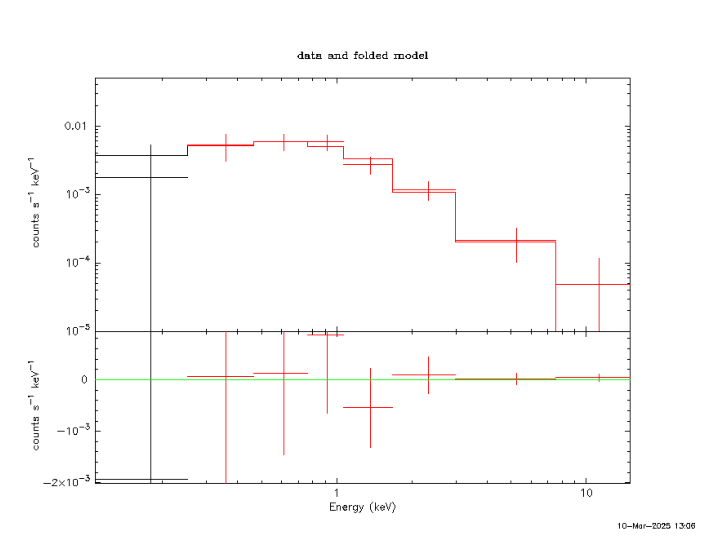

In [22]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_powerlaw.png')[0])
plt.imshow(img)
plt.axis('off')

## ESASky
There are a bunch of EPIC Stack pointers on the light green/blue source and one pointer on an extremely close blue source. https://sky.esa.int/esasky/?target=52.38566666666666%20-28.617833333333333&hips=XMM-Newton+EPIC+color&fov=1&projection=SIN&cooframe=J2000&sci=true&lang=fr

**Green source**

``EPIC Stack``
- Stack Catalogue name : 4XMMs J032932.2-283705
- IAU name : 4XMM J032932.3-283705
- RA : 03h 29m 32.247s
- DEC : -28° 37' 05.84"

**Blue source**

``EPIC Stack``
- Stack Catalogue name : 4XMMs J032933.0-283717
- IAU name : 4XMM J032933.1-283720
- RA : 03h 29m 33.006s
- DEC : -28° 37' 17.85""

## Column density nH
### 3DNH-tool
http://astro.uni-tuebingen.de/nh3d/nhtool

**Sky coordinates (°) :**

- RA = 52.3844241°
- Dec = -28.6182713°

52.38 -28.62

**Column density :** nH = 4*10^20 cm^-2

The different models give a column density of :

- bbody : nH = 2.29296*10^4
- bremss : nH = 3.29681*10^20
- apec : nH = 8.47079*10^21
- powerlaw : nH = 6.74847*10^20

bremss and powerlaw column density values are the closest to 3DNH-tool's value.

## Flux

In [23]:
AllModels.calcFlux(".2 12.0")

Spectrum Number: 1, 2
Data Group Number: 1
 Model Flux 5.9017e-05 photons (1.6609e-13 ergs/cm^2/s) range (0.20000 - 12.000 keV)


In [24]:
Flux = 1.6609e-13 # ergs/cm^2/s

## Luminosity
No distance or parallax is available on ESASky.

In [26]:
# For a star in the milky way : d=[1 pc - 30 kpc]
d_pc = 1 # Distance en pc
d_kpc = 30 # Distance en kpc

d1_cm = d_pc*3.0857*10**18 # Distance en cm, avec 1 pc = 3.0857*10^18 cm
d2_cm = d_pc*3.0857*10**21 # Distance en cm, avec 1 pc = 3.0857*10^18 cm

# La source est supposée sphérique pour le calcul de la luminosité : L = 4*pi*F*D^2
L1 = 4*np.pi*Flux*(d1_cm)**2 # erg/s
L2 = 4*np.pi*Flux*(d2_cm)**2 # erg/s

print(color.BOLD+"For a star in the milky way? with d=[1 pc - 30 kpc] :"+color.END)
print(f"Luminosity : [{L1}, {L2}] erg/s")

# For a galaxy : d=[1 Mpc - 10 Gpc]
d_Mpc = 1 # Distance en Mpc
d_Gpc = 10 # Distance en Gpc

d1_cm = d_Mpc*3.0857*10**24 # Distance en cm, avec 1 pc = 3.0857*10^18 cm
d2_cm = d_Gpc*3.0857*10**27 # Distance en cm, avec 1 pc = 3.0857*10^18 cm

# La source est supposée sphérique pour le calcul de la luminosité : L = 4*pi*F*D^2
L1 = 4*np.pi*Flux*(d1_cm)**2 # erg/s
L2 = 4*np.pi*Flux*(d2_cm)**2 # erg/s

print()
print(color.BOLD+"For a galaxy? with d=[1 Mpc - 10 Gpc] :"+color.END)
print(f"Luminosity : [{L1}, {L2}] erg/s")

For a star in the milky way? with d=[1 pc - 30 kpc] :
Luminosity : [1.9872877255606033e+25, 1.9872877255606033e+31] erg/s

For a galaxy? with d=[1 Mpc - 10 Gpc] :
Luminosity : [1.9872877255606036e+37, 1.9872877255606037e+45] erg/s


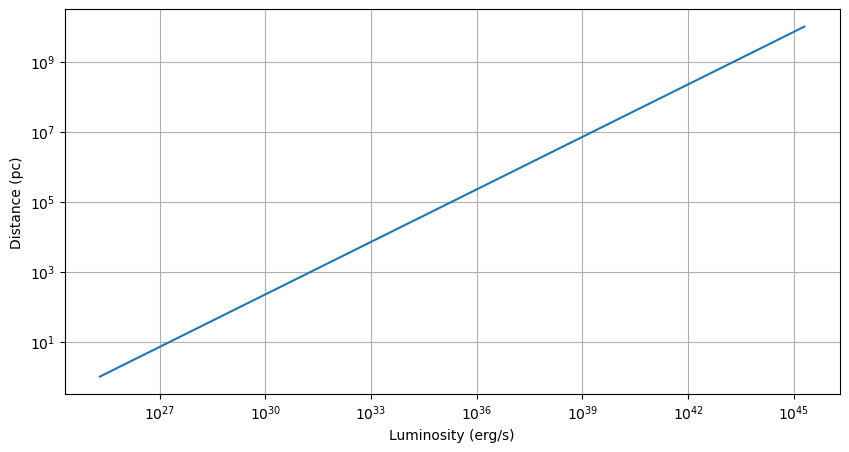

In [27]:
D_pc = np.arange(1, 10**10, 1000)

d_cm = D_pc*3.0857*10**18 # Distance en cm, avec 1 pc = 3.0857*10^18 cm

# La source est supposée sphérique pour le calcul de la luminosité : L = 4*pi*F*D^2
L = 4*np.pi*Flux*(d_cm)**2 # erg/s

plt.figure(figsize=[10,5])
plt.plot(L,D_pc)
plt.xlabel("Luminosity (erg/s)")
plt.ylabel("Distance (pc)")
plt.xscale("log")
plt.yscale("log")
plt.grid()